<a href="https://colab.research.google.com/github/bamacgabhann/GGY4006/blob/main/gy4006/GY4006_7_Vector_Geoprocessing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY4006/main/gy4006/assets/images/GY4006_logo_1.png" align=center alt="UL Geography logo"/>

# Vector Geoprocessing

So far, we've looked at different types of data, how geospatial data can be stored as vector coordinates with attributes, making sure we use a relevant coordinate reference system; and the file types used to store data in this format.

This brings us to a point where we can start doing geoprocessing, or analysis, of real geospatial data.

Of course, in order to actually work on real geospatial data, we need to know where to get some! So let's start by looking at some sources of vector geospatial data.

## 1. Sources of Vector Geospatial Data

There is no way we could list all sources here - there's just far, far too many. But I think it's worth mentioning a few here, in part to demonstrate the widespread availability of geospatial data, and just in case you want to play with any of them.

A lot of the geospatial data for Ireland is available from a single source:

- [data.gov.ie](https://data.gov.ie/) and [GeoHive](https://webapps.geohive.ie/mapviewer/index.html)

    The Irish Government's Open Data portal currently lists 18,439 open datasets from 146 publishers, covering almost all areas of Government. Topics relevant to the environment include *Agriculture, Fisheries, Forestry, & Food*; *Energy*; *Environment*; *Health*; *Housing and Zoning*; *Population and Society*; *Regions and Cities*; and *Transport*. Data can also be viewed and downloaded through the GeoHive online mapviewer.

- [data.europa.eu](https://data.europa.eu/en)

    The European Union's official data portal also facilitates access to the data from the data.gov.ie portal, as well as data for other European countries and multinational data.

There are some datasets not available through these portals, or more easily available from other sources:
    
- [CSO Census 2022 Small Area Population Statistics](https://www.cso.ie/en/census/census2022/census2022smallareapopulationstatistics/)

    The census of population is taken every 5 years normally - with the pandemic delaying the most recent version slightly. The data is available from the Central Statistics Office at a range of geospatial data levels - including province, administrative county, Local Electoral Areas, Electoral Divisions, and Small Areas. Data and maps are provided separately, and must be combined to use as geospatial data.

- Environmental Protection Agency (EPA): [data downloads](https://gis.epa.ie/GetData/Download) and [web mapping services](https://gis.epa.ie/GetData/Connect)

    The EPA is responsible for most environmental monitoring and management, including compliance with EU directives such as the Water Framework Directive, air quality monitoring, noise monitoring, and radiological protection.

- [Met Éireann](https://www.met.ie/climate/available-data)

    Met Éireann publishes current and historic data from weather stations around the country.

- OPW: [waterlevel.ie](https://waterlevel.ie/hydro-data/) 

    The Office of Public Works (OPW) has responsibility for flood risk management, and monitors water levels for rivers throughout the country. This one, we're going to be using in this module.

Some data is best available from non-government sources. In particular, Tailte Éireann - formerly the Ordnance Survey Ireland - is responsible for mapping, but the high resolution data is only available at cost. Of course you can look at detailed mapping from other sources like Google Maps - but similarly, you can't download individual feature sets like the roads, or the buildings, from Google Maps - you can only look at the overall map. There is one incomplete, but useful, source of this data, however.

- OpenStreetMap [openstreetmap.org](https://www.openstreetmap.org/); download from [geofabrik.de](https://download.geofabrik.de/)

    If you're not familiar with OpenStreetMap, you can think of it as being the open source version of Google Maps. With OpenStreetMap, anyone can contribute data - and anyone can download and use the data.



## 2. Joining Vector and Attribute Data

Sometimes, you'll have one file containing the geometry of particular features, and a second file containing attribute data for those features. Can you use them together? 

Yes, easily. 

Let's demonstrate using data from the most recent Census of Population in Ireland. The most detailed data from this is published at *small area* level. Small areas are defined to be comparable in size and population, with each typically having 50-200 dwellings, and ideally comprising complete townlands or neighbourhoods. 

The data at small areas level is published by the CSO, separately from the map of the small areas. However, the data does contain references indicating which small area each row of data is for. We can use this to join the data to the map. Let's start by reading in the map of the small areas. We can do this directly from the Government's Open Data portal:

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# this will take a few minutes to load - be patient

%time
small_areas = gpd.read_file('https://opendata.arcgis.com/api/v3/datasets/70a33cbb8bd7406da0d571be28624721_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')

small_areas.head()

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 5.01 µs


,OBJECTID,SA_GUID_2016,SA_GUID_2022,SA_PUB2011,SA_PUB2016,SA_PUB2022,SA_GEOGID_2022,SA_CHANGE_CODE,SA_URBAN_AREA_FLAG,SA_URBAN_AREA_NAME,...,ED_GAEILGE,ED_ID_STR,ED_PART_COUNT,COUNTY_CODE,COUNTY_ENGLISH,COUNTY_GAEILGE,CSO_LEA,SHAPE_Length,SHAPE_Area,geometry
0,1,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,017010016,017010016,017010016,A017010016,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,0.023915,0.000027,"MULTIPOLYGON (((-6.91417 52.84479, -6.91425 52..."
1,2,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,017010046,017010046,017010046,A017010046,4,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,0.033138,0.000038,"MULTIPOLYGON (((-6.90269 52.82338, -6.90289 52..."
2,3,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,017010037,017010037,017010037,A017010037,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,0.031117,0.000028,"MULTIPOLYGON (((-6.90585 52.83666, -6.90584 52..."
3,4,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,017010005,017010005,017010005,A017010005,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,0.033269,0.000047,"MULTIPOLYGON (((-6.93275 52.82749, -6.93283 52..."
4,5,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,017010036,017010036,017010036,A017010036,0,1,Carlow,...,CEATHARLACH (TUATH),017010,1,01,CARLOW,Ceatharlach,CARLOW,0.032480,0.000057,"MULTIPOLYGON (((-6.90583 52.84255, -6.90616 52..."


This is a relatively big dataset, and will take a little time to download, so don't panic if it doesn't run quickly. We're downloading it in GeoJSON format, even though it's also available as a smaller shapefile, because some of the column names are more than 10 characters long, and cutting them off at 10 characters - as the shapefile format does - will leave some columns where we don't know which is which. Most importantly, some small areas were redefined between 2016 and 2022, and so there's columns with the IDs for both years; SA_GUID_2016 and SA_GUID_2022 truncated to 10 characters are both SA_GUID_20. Really not the two columns you want to be confusing.

And now let's get the census data tables at Small Areas level from the CSO:

In [3]:
# again this will take a little time to load - be patient
small_areas_data = pd.read_csv('https://www.cso.ie/en/media/csoie/census/census2022/SAPS_2022_Small_Area_270923.csv')
small_areas_data.head()

,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_1_2C,T15_1_3C,T15_1_GE4C,T15_1_NSC,T15_1_TC,T15_2_BB,T15_2_OIC,T15_2_NO,T15_2_NS,T15_2_T
0,IE0,Ireland,Ireland,29610,28875,30236,31001,31686,32684,34092,...,594716,121594,46658,131326,1836728,1457883,73165,159866,145814,1836728
1,00b00ae4-229d-455d-84f1-d6face4876b1,147002002/02,147002002/02,2,6,3,2,6,5,4,...,20,3,1,20,116,88,4,4,20,116
2,03003797-1fcd-4fcf-8dde-b2188e3fb1db,167070005/01/167070001,167070005/01/167070001,1,3,2,1,1,3,1,...,43,16,4,7,119,93,1,17,8,119
3,06650182-eeaa-4c6c-847c-f85ddaf5361b,087064009/03,087064009/03,4,1,2,3,1,2,1,...,59,9,2,6,114,106,2,1,5,114
4,08e82f06-46ee-4141-aa07-79a793a12b27,087001012/02,087001012/02,1,1,0,2,1,0,1,...,26,3,0,2,86,80,1,3,2,86


Now, we can see that in the small areas maps, the column with the ID for each area is ```SA_GUID_2022```, whereas in the data tables, it's just ```GUID```. We would prefer these to be the same name, so we can easily link them, so let's rename the column in the data tables:

In [4]:
small_areas_data = small_areas_data.rename(columns = {'GUID':'SA_GUID_2022'})
small_areas_data.head()

,SA_GUID_2022,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,...,T15_1_2C,T15_1_3C,T15_1_GE4C,T15_1_NSC,T15_1_TC,T15_2_BB,T15_2_OIC,T15_2_NO,T15_2_NS,T15_2_T
0,IE0,Ireland,Ireland,29610,28875,30236,31001,31686,32684,34092,...,594716,121594,46658,131326,1836728,1457883,73165,159866,145814,1836728
1,00b00ae4-229d-455d-84f1-d6face4876b1,147002002/02,147002002/02,2,6,3,2,6,5,4,...,20,3,1,20,116,88,4,4,20,116
2,03003797-1fcd-4fcf-8dde-b2188e3fb1db,167070005/01/167070001,167070005/01/167070001,1,3,2,1,1,3,1,...,43,16,4,7,119,93,1,17,8,119
3,06650182-eeaa-4c6c-847c-f85ddaf5361b,087064009/03,087064009/03,4,1,2,3,1,2,1,...,59,9,2,6,114,106,2,1,5,114
4,08e82f06-46ee-4141-aa07-79a793a12b27,087001012/02,087001012/02,1,1,0,2,1,0,1,...,26,3,0,2,86,80,1,3,2,86


Combining these takes just one simple line of code, asking to merge the small areas map file with the data, specifying that they should be merged based on the ```SA_GUID_2022``` columns in each file - the columns containing the reference ID for each small area.

In [5]:
small_areas = small_areas.merge(small_areas_data, on='SA_GUID_2022')
small_areas.head()

,OBJECTID,SA_GUID_2016,SA_GUID_2022,SA_PUB2011,SA_PUB2016,SA_PUB2022,SA_GEOGID_2022,SA_CHANGE_CODE,SA_URBAN_AREA_FLAG,SA_URBAN_AREA_NAME,...,T15_1_2C,T15_1_3C,T15_1_GE4C,T15_1_NSC,T15_1_TC,T15_2_BB,T15_2_OIC,T15_2_NO,T15_2_NS,T15_2_T
0,1,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4f-851d-e053-ca3ca8c0ca7f,017010016,017010016,017010016,A017010016,0,1,Carlow,...,37,3,2,7,114,94,2,10,8,114
1,2,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,4c07d11e-0a3a-851d-e053-ca3ca8c0ca7f,017010046,017010046,017010046,A017010046,4,1,Carlow,...,47,2,2,5,120,107,2,4,7,120
2,3,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,4c07d11e-0a4e-851d-e053-ca3ca8c0ca7f,017010037,017010037,017010037,A017010037,0,1,Carlow,...,30,7,0,4,132,106,3,17,6,132
3,4,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,4c07d11e-0a25-851d-e053-ca3ca8c0ca7f,017010005,017010005,017010005,A017010005,0,1,Carlow,...,30,13,7,31,144,111,1,3,29,144
4,5,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,4c07d11e-0a57-851d-e053-ca3ca8c0ca7f,017010036,017010036,017010036,A017010036,0,1,Carlow,...,27,3,2,3,87,69,2,14,2,87


Done. I know it doesn't look any different to the ```small_areas.head()``` result above - but check the size. Here it's showing 5 rows by 821 columns; earlier it was 5 rows x 29 columns. It's now added the 793 columns from the ```small_areas_data``` layer. 

Before we move on to mapping any of this data, though, let's check what map projection it's in.

In [6]:
small_areas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Better to have it in the Irish Transverse Mercator projection, so let's reproject it:

In [7]:
small_areas = small_areas.to_crs(2157)
small_areas.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Done. We can now plot the CSO data on a map - though we have to choose which column we want to plot. Here's a plot based on the column ```T1_1AGETT```, which, if you check the [census data glossary](https://www.cso.ie/en/media/csoie/census/census2022/Glossary_Saps_2022_270923.xlsx), contains the total population of all ages in each small area.

<Axes: >

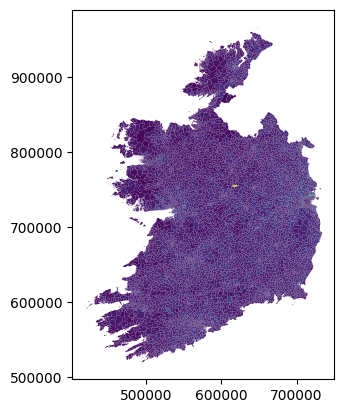

In [8]:
small_areas.plot(column='T1_1AGETT')

Of course this is just the absolute most basic possible plot - we didn't specify anything other than what data to show. We can, of course, exercise more control over the map, for example:

<Axes: >

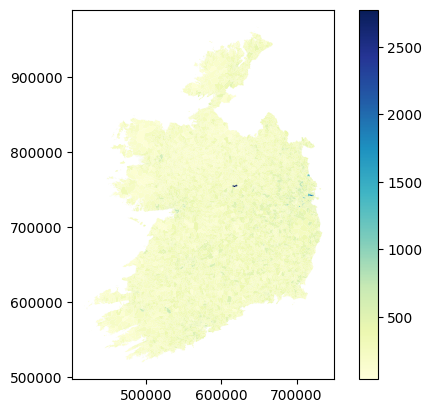

In [9]:
small_areas.plot(column='T1_1AGETT', cmap='YlGnBu', legend=True)

Actually, this isn't the most useful column to plot, because the small areas are literally drawn to be more or less even in terms of population. So there's not much variation. But there's plenty of other data in there. Let's look at how many people in each area commute to work by bus - that's column ```T11_1_BUW```.

<Axes: >

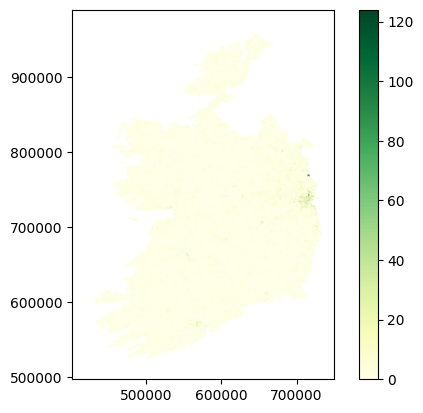

In [10]:
small_areas.plot(column='T11_1_BUW', cmap='YlGn', legend=True)

Yikes, that doesn't look like very many.

## 3. Attribute Calculations

The thing is though, with only small numbers in each area, it's always going to be a fairly small number for this. It's also perhaps a bit misleading to look at only commuting by bus - if we are interested in buses specifically, great, but what if we're interested in sustainable transport options in general? What about trains, cycling, and walking? Plus, this is only the numbers for work - what about commuting to school or college?

The broader point I'm making here is that raw numbers can be useful, but often it's much more useful to combine them. We can calculate new attribute columns based on the data we have. So, let's do that by looking at sustainable transport in general. For this, we'll need 8 columns of transport data:

- ```T11_1_FW``` On foot - Work
- ```T11_1_BIW``` Bicycle - Work
- ```T11_1_BUW``` Bus, minibus or coach - Work
- ```T11_1_TDLW``` Train, DART or LUAS - Work
- ```T11_1_FSCCC``` On foot - School, college or childcare
- ```T11_1_BISCCC``` Bicycle - School, college or childcare
- ```T11_1_BUSCCC``` Bus, minibus or coach - School, college or childcare
- ```T11_1_TDLSCCC``` Train, DART or LUAS - School, college or childcare

And rather than using raw numbers, let's look at the *percentage* of people in each area who use sustainable transport options for commuting. For this, we need a column for population: that would be ```T11_1_TT```.

The maths here is simple - we want to add the sustainable transport options, divide by the total, and multiply the result by 100 to make it a percentage - and we want to do that for every row, putting the result in a new column.

<Axes: >

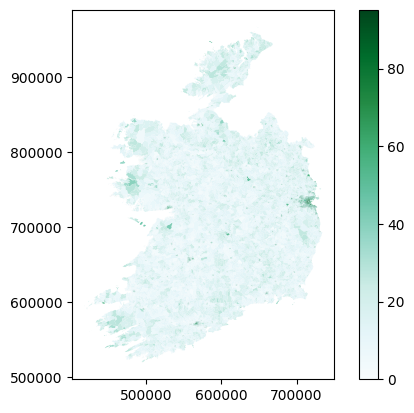

In [11]:
small_areas['sustainable_transport'] = ((
    small_areas['T11_1_FW'] + 
    small_areas['T11_1_BIW'] + 
    small_areas['T11_1_BUW'] + 
    small_areas['T11_1_TDLW'] + 
    small_areas['T11_1_FSCCC'] + 
    small_areas['T11_1_BISCCC'] + 
    small_areas['T11_1_BUSCCC'] + 
    small_areas['T11_1_TDLSCCC']
)/small_areas['T11_1_TT'])*100

small_areas.plot(column='sustainable_transport', cmap='BuGn', legend=True)

Doing this kind of geospatial analysis is really very straightforward - the mapping or processing isn't tricky. The tricky part is deciding what you want to do, and figuring out if you have the right data to do it.

## 4. Aggregating

I'm not entirely convinced that map is hugely useful either. Not on a national scale, anyway. If we were looking at, say, Dublin, or Limerick, in isolation, trying to see if bus routes were working in certain places, then yes, doing this would be appropriate. But on a national scale, it's probably more useful to just see the average numbers for particular places.

Again, this isn't just about that map specifically, I'm using this as an example of a broader point that sometimes, we're not necessarily interested in the full level of detail of a dataset, but rather want to aggregate the data for particular questions. 

In this example, what we'd probably be most interested in, at a national level, is the proportion of people using sustainable transport options in urban areas - because of course, as we can see on the map above, rural areas really aren't - there just aren't any practical sustainable options right now for most rural areas.

We can do this by what's called *dissolving* the data - meaning merging all features which share some attribute in common. To look at the sustainable transport options in each urban area, we will dissolve the data by the ```SA_URBAN_AREA_NAME``` column, which contains the names of the urban area each small area is part of - if they are part of one. 

You can see in the ```head``` table above that the first couple of small areas in the list are part of Carlow town. The dissolve method will merge these all to a single feature - combining the polygon shapes for each small area in Carlow town. There will be a separate feature combining all the small areas in Limerick, and one for Galway, and one for Sligo...and so on. Each urban area named will get a single row combining all the data from all rows where that urban area was previously named.

Of course, that means there'll only be one cell to contain population data, rather than one cell for each small area - and the same for every other column. So we also have to specify how this will be handled. Since we want the average for each urban area, we could take the mean of all the values for each urban area, and save the total in the relevant new row. 

However, that would also take the mean for all the other data columns, which isn't appropriate. But we also don't *need* all of those other columns for this.

So, let's create a separate GeoDataFrame with only the geometry polygons, urban area name, and sustainable transport percentages.

In [12]:
sa_sustrans = small_areas[['geometry', 'SA_URBAN_AREA_NAME', 'sustainable_transport']]
sa_sustrans.head()

,geometry,SA_URBAN_AREA_NAME,sustainable_transport
0,"MULTIPOLYGON (((673146.546 677647.750, 673141....",Carlow,20.289855
1,"MULTIPOLYGON (((673956.346 675276.804, 673941....",Carlow,21.250000
2,"MULTIPOLYGON (((673720.644 676751.987, 673721....",Carlow,35.175879
3,"MULTIPOLYGON (((671923.304 675704.149, 671917....",Carlow,35.579515
4,"MULTIPOLYGON (((673711.843 677406.320, 673691....",Carlow,21.739130


In a more real example, we'd probably keep a few more columns, but this is fine to demonstrate the principle. 

Now we can run the dissolve, and specify ```mean``` as the ```aggfunc``` - the aggregate function determining how to merge the data.

```mean``` is only one option for ```aggfunc``` - you can also specify first, last, min, max, median, sum, or a custom function. But mean is what we need in this case.

In [13]:
sa_sustrans_urb = sa_sustrans.dissolve(by='SA_URBAN_AREA_NAME', aggfunc='mean')
sa_sustrans_urb

,geometry,sustainable_transport
SA_URBAN_AREA_NAME,,
Abbeydorney,"POLYGON ((485341.032 623162.999, 485349.434 62...",15.950151
Abbeyfeale,"POLYGON ((510917.378 625991.756, 510915.573 62...",23.899938
Abbeyknockmoy,"POLYGON ((549725.461 742703.203, 549712.892 74...",17.870722
Abbeyleix,"POLYGON ((643736.285 684505.592, 643805.947 68...",25.178486
Adamstown,"POLYGON ((687189.780 627752.484, 687191.339 62...",21.463415
...,...,...
Whitegate,"MULTIPOLYGON (((584028.934 563668.331, 584023....",16.129441
Wicklow,"POLYGON ((730729.916 693028.640, 730725.348 69...",24.920175
Williamstown,"POLYGON ((561884.081 769998.431, 561884.075 76...",14.615385


<Axes: >

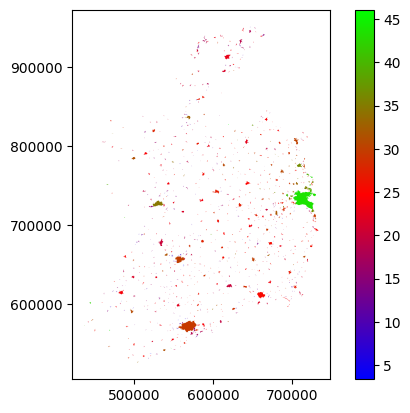

In [14]:
sa_sustrans_urb.plot(column='sustainable_transport', cmap='brg', legend=True)

We could probably do better, especially if we start playing with the colour scale, but you can see the urban areas and variations between them. Dublin's doing well - it should, it has the Luas and Dart as well as Dublin Bus. Everywhere else is, well, not great. Room for improvement. 

In any case, this is not so much about this one map in particular, but more to demonstrate the general point of aggregating data - and that worked just fine, so hopefully you get that concept now.

## 5. Clipping

Now, the maps above are showing data for the entire State, but what if you just want to look at one place? It's kinda hard to make out Limerick there. We could just zoom the map in on Limerick, but that seems a bit wasteful, since we'd still be processing all the data for everywhere else behind the scenes.

In the last example, we created a new dataframe which had only the columns we are interested in. Can we also do the same with rows?

Yes, absolutely. In fact, we did - dissolving by the urban area names column dropped all rows which aren't named as part of an urban area.

Could we isolate all the rows for Limerick? Yes, we can. In fact, there's two ways to do this. One would be simply extracting the rows which have Limerick as the urban area name.

In [15]:
sa_limerick = small_areas[small_areas['SA_URBAN_AREA_NAME']=='Limerick city and suburbs']
sa_limerick.head()

,OBJECTID,SA_GUID_2016,SA_GUID_2022,SA_PUB2011,SA_PUB2016,SA_PUB2022,SA_GEOGID_2022,SA_CHANGE_CODE,SA_URBAN_AREA_FLAG,SA_URBAN_AREA_NAME,...,T15_1_3C,T15_1_GE4C,T15_1_NSC,T15_1_TC,T15_2_BB,T15_2_OIC,T15_2_NO,T15_2_NS,T15_2_T,sustainable_transport
4985,4986,4c07d11d-f9a7-851d-e053-ca3ca8c0ca7f,4c07d11d-f9a7-851d-e053-ca3ca8c0ca7f,037009019,037009019,037009019,A037009019,0,1,Limerick city and suburbs,...,10,2,4,98,90,1,3,4,98,18.048780
4986,4987,4c07d11e-19db-851d-e053-ca3ca8c0ca7f,4c07d11e-19db-851d-e053-ca3ca8c0ca7f,037009007,037009007,037009007,A037009007,0,1,Limerick city and suburbs,...,9,1,11,118,89,1,16,12,118,15.094340
4987,4988,4c07d11e-19dc-851d-e053-ca3ca8c0ca7f,4c07d11e-19dc-851d-e053-ca3ca8c0ca7f,037009012,037009012,037009012,A037009012,0,1,Limerick city and suburbs,...,4,0,8,89,71,0,9,9,89,23.584906
4988,4989,4c07d11e-1a6a-851d-e053-ca3ca8c0ca7f,4c07d11e-1a6a-851d-e053-ca3ca8c0ca7f,037009016,037009016,037009016,A037009016,0,1,Limerick city and suburbs,...,4,0,23,135,107,2,2,24,135,7.333333
4989,4990,4c07d11e-19e6-851d-e053-ca3ca8c0ca7f,4c07d11e-19e6-851d-e053-ca3ca8c0ca7f,037009011,037009011,037009011,A037009011,0,1,Limerick city and suburbs,...,3,0,5,67,56,0,5,6,67,21.739130


<Axes: >

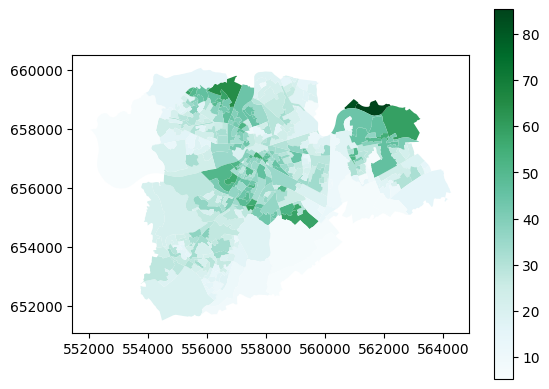

In [16]:
sa_limerick.plot(column='sustainable_transport', cmap='BuGn', legend=True)

I did say above that plotting the data this way would be more useful looking at local areas - and yes, it is, isn't it?

There is another way to isolate the data for Limerick, and that's to *clip* it using a second layer with geometry.

Luckily, I happen to have a file which contains the geometry of the Limerick Metropolitan area - and we can use that to clip the small areas data.

In [17]:
limerick_metropolitan = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/LimerickMetropolitan.gpkg')
limerick_metropolitan.plot()

HTTPError: HTTP Error 404: Not Found

In [18]:
sa_clip_limerick = gpd.clip(small_areas, limerick_metropolitan)
sa_clip_limerick.plot(column='sustainable_transport', cmap='BuGn', legend=True)

NameError: name 'limerick_metropolitan' is not defined

This covers more area than the previous - that's because the Limerick Metropolitan area - the area covered by the Limerick City North, Limerick City West, and Limerick City East electoral areas - also includes a lot of more rural areas surrounding the city itself. 

That's not really the important point though - the takeaway here is that you can use the extent of one file to *clip* the contents of another, so that they both cover only the same area.

## 6. Buffering

Buffering means defining an area within a certain distance of a feature. For example, you might want to look at how many people live within 500m of a bus stop - in which case you could create a 500m buffer around the bus stop. Or around multiple bus stops.

Why yes, I do happen to have maps of the bus stops in Limerick.

In [19]:
limerick_stops_301_to_raheen = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='301_to_raheen')
limerick_stops_301_to_westbury = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='301_to_westbury')
limerick_stops_302 = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='302')
limerick_stops_303_to_omalley_park = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='303_to_omalley_park')
limerick_stops_303_to_pineview = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='303_to_pineview')
limerick_stops_304_to_raheen = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='304_to_raheen')
limerick_stops_304_to_ul = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='304_to_ul')
limerick_stops_304a_to_raheen = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='304a_to_raheen')
limerick_stops_304a_to_ul = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='304a_to_ul')
limerick_stops_305_to_liddy_st = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='305_to_liddy_st')
limerick_stops_305_to_william_st = gpd.read_file('https://github.com/bamacgabhann/GY4006/raw/main/gy4006/sample_data/Limerick_Bus_Stops.gpkg', layer='305_to_william_st')

HTTPError: HTTP Error 404: Not Found

Separate map for each route - but we can plot all of these on one map. 

In [20]:
import matplotlib.pyplot as plt

NameError: name 'limerick_stops_301_to_raheen' is not defined

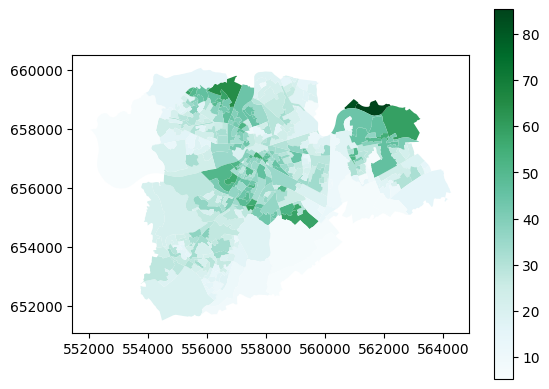

In [21]:
fig, ax = plt.subplots()
sa_limerick.plot(ax=ax, column='sustainable_transport', cmap='BuGn', legend=True)
limerick_stops_301_to_raheen.plot(ax=ax, marker='>', color='red', markersize=5)
limerick_stops_301_to_westbury.plot(ax=ax, marker='<', color='tomato', markersize=5)
limerick_stops_302.plot(ax=ax, marker='D', color='darkorange', markersize=5)
limerick_stops_303_to_omalley_park.plot(ax=ax, marker='>', color='sienna', markersize=5)
limerick_stops_303_to_pineview.plot(ax=ax, marker='<', color='gold', markersize=5)
limerick_stops_304_to_raheen.plot(ax=ax, marker='>', color='skyblue', markersize=5)
limerick_stops_304_to_ul.plot(ax=ax, marker='<', color='royalblue', markersize=5)
limerick_stops_304a_to_raheen.plot(ax=ax, marker='>', color='dodgerblue', markersize=5)
limerick_stops_304a_to_ul.plot(ax=ax, marker='<', color='blue', markersize=5)
limerick_stops_305_to_liddy_st.plot(ax=ax, marker='>', color='fuchsia', markersize=5)
limerick_stops_305_to_william_st.plot(ax=ax, marker='<', color='violet', markersize=5)
plt.show()

This is the first time we've put multiple layers on the same map - reasonably straightforward, I hope. Now, we can buffer the bus stop layers:

NameError: name 'limerick_stops_301_to_raheen' is not defined

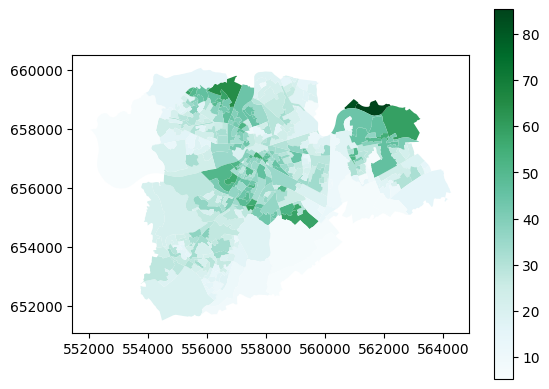

In [22]:
fig, ax = plt.subplots()
sa_limerick.plot(ax=ax, column='sustainable_transport', cmap='BuGn', legend=True)
limerick_stops_301_to_raheen.buffer(500).boundary.plot(ax=ax)
limerick_stops_301_to_westbury.buffer(500).boundary.plot(ax=ax)
limerick_stops_302.buffer(500).boundary.plot(ax=ax)
limerick_stops_303_to_omalley_park.buffer(500).boundary.plot(ax=ax)
limerick_stops_303_to_pineview.buffer(500).boundary.plot(ax=ax)
limerick_stops_304_to_raheen.buffer(500).boundary.plot(ax=ax)
limerick_stops_304_to_ul.buffer(500).boundary.plot(ax=ax)
limerick_stops_304a_to_raheen.buffer(500).boundary.plot(ax=ax)
limerick_stops_304a_to_ul.buffer(500).boundary.plot(ax=ax)
limerick_stops_305_to_liddy_st.buffer(500).boundary.plot(ax=ax)
limerick_stops_305_to_william_st.buffer(500).boundary.plot(ax=ax)
limerick_stops_301_to_raheen.plot(ax=ax, marker='>', color='red', markersize=5)
limerick_stops_301_to_westbury.plot(ax=ax, marker='<', color='tomato', markersize=5)
limerick_stops_302.plot(ax=ax, marker='D', color='darkorange', markersize=5)
limerick_stops_303_to_omalley_park.plot(ax=ax, marker='>', color='sienna', markersize=5)
limerick_stops_303_to_pineview.plot(ax=ax, marker='<', color='gold', markersize=5)
limerick_stops_304_to_raheen.plot(ax=ax, marker='>', color='skyblue', markersize=5)
limerick_stops_304_to_ul.plot(ax=ax, marker='<', color='royalblue', markersize=5)
limerick_stops_304a_to_raheen.plot(ax=ax, marker='>', color='dodgerblue', markersize=5)
limerick_stops_304a_to_ul.plot(ax=ax, marker='<', color='blue', markersize=5)
limerick_stops_305_to_liddy_st.plot(ax=ax, marker='>', color='fuchsia', markersize=5)
limerick_stops_305_to_william_st.plot(ax=ax, marker='<', color='violet', markersize=5)
plt.show()

Getting a bit messy in some places, but you can clearly see where *isn't* within 500m of a bus stop. 

Anyway, once again the real takaway isn't this dataset in particular, it's the concept of drawing buffers. 

## 7. Intersecting

When we used the Limerick Metropolitan map to clip the small_areas map, that's one way of using two datasets together. But what if we want to combine two datasets where they're overlapping, and keep all the data from both datasets in the new combined layer?

This is called intersecting, and to demonstrate, let's get a map of all the buildings in Limerick.

We'll get it from OpenStreetMap. Buildings are fiddly, so in many places, this dataset wouldn't be complete. I know it's complete for Limerick, though, because I completed it.

For OpenStreetMap, in the data sources Notebook, I gave a link to GeoFabrik. I did that because if you're using QGIS or ArcGIS Pro, that's most likely what you'd use. However, in Python, we can use the package osmnx to get only the data we want from OpenStreetMap - instead of having to download all the data for the whole country.

In [23]:
if 'google.colab' in str(get_ipython()):
  !pip install osmnx
import osmnx as ox

<Axes: >

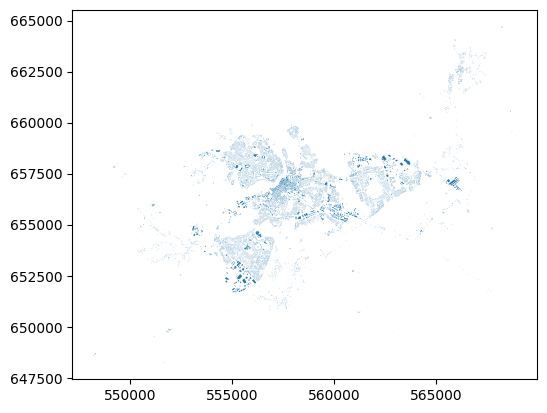

In [24]:
place = "Limerick, Ireland"
tags = {"building": True}
lk_buildings = ox.features_from_place(place, tags)
lk_buildings = lk_buildings[lk_buildings.geom_type == 'Polygon']
lk_buildings = lk_buildings.to_crs(2157)
lk_buildings.plot()

That's all the buildings in Limerick, pulled from OpenStreetMap by the library <a href='https://geoffboeing.com/2016/11/osmnx-python-street-networks/'>osmnx</a>. There's <a href='https://github.com/gboeing/osmnx-examples/tree/main/notebooks'>some great examples</a> of how to use osmnx by the package author Geoff Boeing.

Let's intersect this with the small areas layer.

<Axes: >

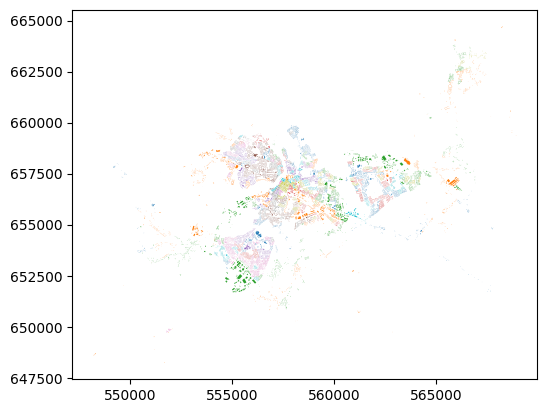

In [25]:
lk_buildings_sa = lk_buildings.overlay(small_areas, how='intersection')
lk_buildings_sa.plot(column="SA_GUID_2022")

That's all the buildings in Limerick, plotted by colour according to which small area they're in.

They key point here is that what's plotted on the map, i.e. the shapes of the buildings, is no different than the shapes of the buildings when we plotted straight from osmnx. But here, they have now inhereted the attributes of the small area that they're in. That's the power of intersection.

## Summary

We have now been introduced to types of geospatial data, how it's stored as Points, Lines, and Polygons with various attributes, in different file formats, and some of what you can do with the data. While the examples above use Python, the same kinds of geoprocessing are available in QGIS and ArcGIS Pro - so don't worry about the code, it's the concepts which are important.

Getting all the way to this point is a *huge* amount to cover in a short time, and please, don't expect to have learned it all. This is just an introduction, so that you've seen something once. You can refer back to any of the Notebooks at any time, you don't have to remember everything. I'm constantly looking up documentation to check how to do things again - I guarantee you I didn't write all this straight from memory. 

Much of this will take time to sink in - time, and using it. It doesn't matter in the slightest if the "using it" part invoves constantly referring back to guides. If you go on to make more maps, and analyse more data - well, then you'll get used to some of the tools for doing the particular things you use frequently. And if you're not doing it frequently, well, being able to find the right guides and information to let you do what you want to do is all the matters.


___

GY4006 Notebooks in Colab: 

2. Data Types <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_2_Data_Types.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Vector Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_3_Vector_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Attribute Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_4_Attribute_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. Coordinate Reference Systems <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_5_Coordinate_Reference_Systems.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6. Geospatial Data Files <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_6_Geospatial_Data_Files.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7. Vector Geoprocessing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_7_Vector_Geoprocessing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8. Introduction to Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_8_Introduction_To_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

9. Single-band Raster Data <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_9_Single-band_Raster_Data.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10. Multi-band Raster Data: Passive Remote Sensing <a href="https://colab.research.google.com/github/bamacgabhann/GY4006/blob/main/gy4006/notebooks/GY4006_10_Multi-band_Raster_Data-Passive_Remote_Sensing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>